# **Indonesian Hoax News Dataset**

This dataset includes hoax news clarifications sourced directly from the Indonesian government's official channel for hoax clarifications through its Digital Communication Directorate portal, komdigi.go.id. In an era of rampant misinformation, access to verified, machine-readable data from official sources is critical for researchers, data scientists, and developers aiming to build tools and models to combat its spread. It has 13 features including the news topic and viewer's count for each news.

Source : https://www.kaggle.com/datasets/ireddragonicy/indonesian-hoax-news-dataset

# **Named Entity Recognition (NER)**

## **Install libraries**


In [1]:
!pip install spacy

### Install pre-trained model

Model used here is an indonesian NLP model by
firqaaa
Source: https://huggingface.co/firqaaa/id_core_news_sm

In [2]:
!pip install "id_core_news_sm @ https://huggingface.co/firqaaa/id_core_news_sm/resolve/main/id_core_news_sm-any-py3-none-any.whl"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.0/865.0 kB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 118.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 114.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: blis
    Found existing installation: blis 1.3.0
    Uninstalling blis-1.3.0:
      Successfully uninstalled blis-1.3.0
  Attempting uninstall: thinc
    Found existing installation: thinc 8.3.6
    Uninstalling thinc-8.3.6:
      Successfully uninstalled thinc-8.3.6
  Attempting uninstall: spacy
    Found existing installation: spacy 3.8.7
    U

## **Import libraries**


In [89]:
import spacy
from spacy import displacy
from spacy.pipeline import EntityRuler
import pandas as pd
import matplotlib.pyplot as plt
import re

## **Load the spacy model and dataset**


In [4]:
nlp = spacy.load("id_core_news_sm")

In [130]:
df = pd.read_csv("komdigi_hoaks.csv")
df.head(20)

,id,url,title,slug,published_at,view_count,excerpt,body_html,body_text,main_image_url,category,tags,topics
0,61947,https://www.komdigi.go.id/berita/berita-hoaks/...,[HOAKS] OJK Hapus Data Nasabah Pinjol yang Gag...,hoaks-ojk-hapus-data-nasabah-pinjol-yang-gagal...,2025-10-19 23:05:00,11,OJK telah membantah adanya penghapusan data na...,"<p style=""margin-left:0in;text-align:justify;""...",Penjelasan: Beredar sebuah unggahan video di m...,https://web.komdigi.go.id/resource/dXBsb2Fkcy8...,Klarifikasi Hoaks,hoaks hari ini,Hoaks
1,61946,https://www.komdigi.go.id/berita/berita-hoaks/...,[HOAKS] Akun Facebook Mengatasnamakan Kapolres...,hoaks-akun-facebook-mengatasnamakan-kapolres-k...,2025-10-19 23:04:00,6,Humas Polres Kerinci mengeluarkan pemberitahua...,"<p style=""margin-left:0in;text-align:justify;""...",Penjelasan: Beredar akun Facebook mengatasnama...,https://web.komdigi.go.id/resource/dXBsb2Fkcy8...,Klarifikasi Hoaks,hoaks hari ini,Hoaks
2,61945,https://www.komdigi.go.id/berita/berita-hoaks/...,[HOAKS] Program Pembagian Kondom ke Mahasiswa ...,hoaks-program-pembagian-kondom-ke-mahasiswa-da...,2025-10-19 23:03:00,7,Kemenkes menegaskan bahwa pihaknya tidak memil...,"<p style=""margin-left:0in;text-align:justify;""...",Penjelasan: Beredar unggahan di media sosial F...,https://web.komdigi.go.id/resource/dXBsb2Fkcy8...,Klarifikasi Hoaks,hoaks hari ini,Hoaks
3,61944,https://www.komdigi.go.id/berita/berita-hoaks/...,[HOAKS] Puan Maharani Tidak Suka Indonesia Dis...,hoaks-puan-maharani-tidak-suka-indonesia-diseb...,2025-10-19 23:02:00,7,Puan memang menyebut “Negara Konoha” dalam pid...,"<p style=""margin-left:0in;text-align:justify;""...",Penjelasan: Beredar sebuah unggahan di media s...,https://web.komdigi.go.id/resource/dXBsb2Fkcy8...,Klarifikasi Hoaks,hoaks hari ini,Hoaks
4,61943,https://www.komdigi.go.id/berita/berita-hoaks/...,[HOAKS] Akun WhatsApp Mengatasnamakan Kepala B...,hoaks-akun-whatsapp-mengatasnamakan-kepala-bid...,2025-10-19 23:01:00,7,Dilansir dari akun Instagram @pemkab_sukabumi_...,"<p style=""margin-left:0in;text-align:justify;""...","Penjelasan: Beredar di aplikasi WhatsApp, sebu...",https://web.komdigi.go.id/resource/dXBsb2Fkcy8...,Klarifikasi Hoaks,hoaks hari ini,Hoaks
5,61942,https://www.komdigi.go.id/berita/berita-hoaks/...,[HOAKS] Luhut Jadi Tersangka Korupsi Batu Bara,hoaks-luhut-jadi-tersangka-korupsi-batu-bara,2025-10-18 23:59:00,436,NaN,<p>Penjelasan :</p><p>Beredar sebuah unggahan ...,Penjelasan : Beredar sebuah unggahan di media ...,https://web.komdigi.go.id/resource/dXBsb2Fkcy8...,Klarifikasi Hoaks,NaN,Hoaks
6,61941,https://www.komdigi.go.id/berita/berita-hoaks/...,[HOAKS] Presiden Prabowo Promosikan Program Mo...,hoaks-presiden-prabowo-promosikan-program-moto...,2025-10-18 23:58:00,158,NaN,<p>Penjelasan :</p><p>Beredar unggahan di medi...,Penjelasan : Beredar unggahan di media sosial ...,https://web.komdigi.go.id/resource/dXBsb2Fkcy8...,Klarifikasi Hoaks,NaN,Penipuan
7,61940,https://www.komdigi.go.id/berita/berita-hoaks/...,[HOAKS] Akun Instagram Mengatasnamakan Kemente...,hoaks-akun-instagram-mengatasnamakan-kementeri...,2025-10-18 23:57:00,114,NaN,<p>Penjelasan :</p><p>Beredar akun Instagram m...,Penjelasan : Beredar akun Instagram mengatasna...,https://web.komdigi.go.id/resource/dXBsb2Fkcy8...,Klarifikasi Hoaks,NaN,Penipuan
8,61939,https://www.komdigi.go.id/berita/berita-hoaks/...,[HOAKS] Presiden Prabowo Tarik Uang Luar Neger...,hoaks-presiden-prabowo-tarik-uang-luar-negeri-...,2025-10-18 23:56:00,109,NaN,<p>Penjelasan :</p><p>Beredar sebuah unggahan ...,Penjelasan : Beredar sebuah unggahan video di ...,https://web.komdigi.go.id/resource/dXBsb2Fkcy8...,Klarifikasi Hoaks,NaN,Program/Kebijakan
9,61938,https://www.komdigi.go.id/berita/berita-hoaks/...,[HOAKS] PLN Kerja Sama dengan Telegram Bagikan...,hoaks-pln-kerja-sama-dengan-telegram-bagikan-t...,2025-10-17 23:04:00,244,Tautan yang dibagikan di Facebook mengarah ke ...,"<p style=""margin-left:0in;text-align:justify;""...",Penjelasan: Beredar seb

## **Data Exploration**

In [13]:
df.isnull().sum()

,0
id,0
url,0
title,0
slug,0
published_at,0
view_count,0
excerpt,14821
body_html,0
body_text,2
main_image_url,37


In [131]:
topic_counts = df['topics'].value_counts()
df['topics'].value_counts()

,count
topics,
Hoaks,14804
Penipuan,235
Pejabat Publik,113
Masyarakat Digital,102
Program/Kebijakan,52
Kesehatan,50


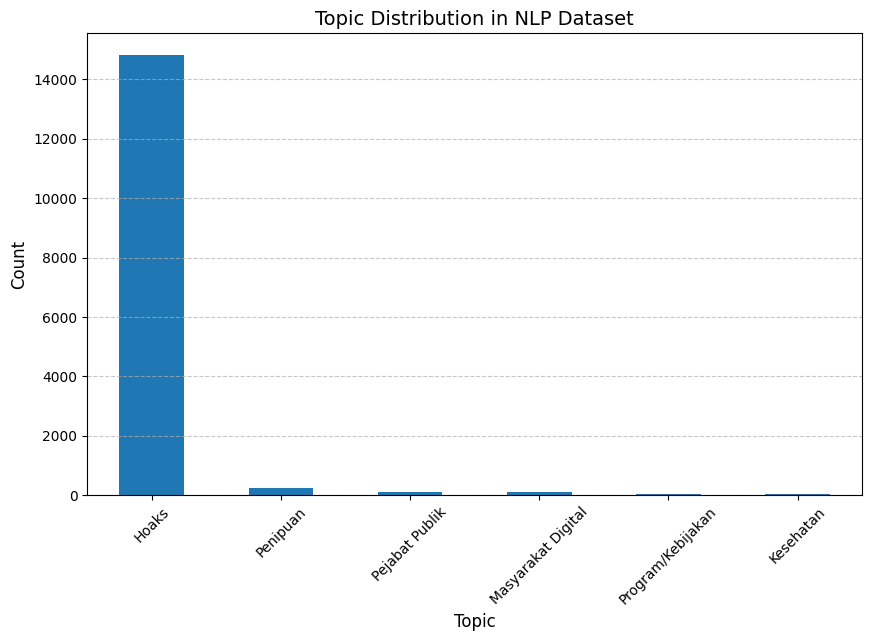

In [123]:
plt.figure(figsize=(10,6))
topic_counts.plot(kind='bar')

plt.title("Topic Distribution in NLP Dataset", fontsize=14)
plt.xlabel("Topic", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Viewers count for each news topics

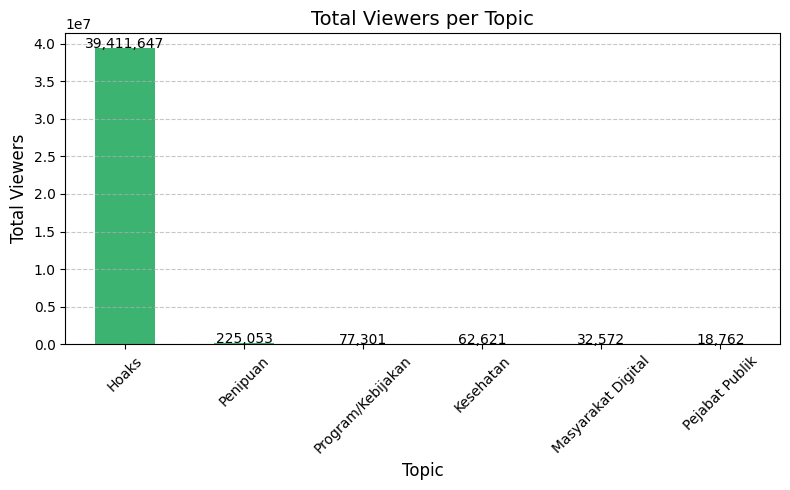

In [124]:
topic_viewers = df.groupby("topics")["view_count"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
topic_viewers.plot(kind='bar', color='mediumseagreen')

plt.title("Total Viewers per Topic", fontsize=14)
plt.xlabel("Topic", fontsize=12)
plt.ylabel("Total Viewers", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(topic_viewers):
    plt.text(i, v + 100, f"{v:,}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

### Topics trends over time

In [132]:
# Convert date column to datetime
df["published_at"] = pd.to_datetime(df["published_at"])

# Count number of posts per date per topic
topic_ot = (
    df.groupby(["published_at", "topics"])
    .size()
    .reset_index(name="count")
)

/tmp/ipython-input-3130413299.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  topic_weekly = topic_pivot.resample("M").sum()
/tmp/ipython-input-3130413299.py:25: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


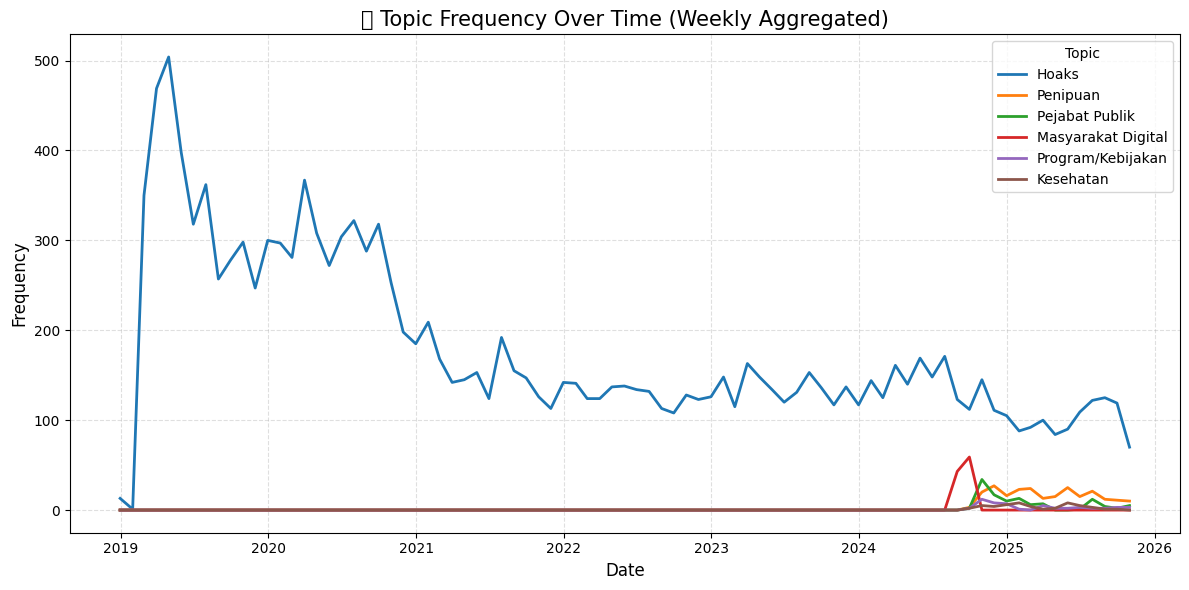

In [141]:
topic_pivot = topic_ot.pivot(index="published_at", columns="topics", values="count").fillna(0)

# Aggregate monthly to reduce clutter
topic_weekly = topic_pivot.resample("M").sum()

top_topics = topic_weekly.sum().nlargest(6).index
topic_weekly = topic_weekly[top_topics]

# Plot chart
plt.figure(figsize=(12, 6))
for topic in topic_weekly.columns:
    plt.plot(
        topic_weekly.index,
        topic_weekly[topic],
        label=topic,
        linewidth=2
    )

plt.title("Topic Frequency Over Time (monthly Aggregated)", fontsize=15)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title="Topic", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

In [10]:
df['body_text'].head(20)

,body_text
0,Penjelasan: Beredar sebuah unggahan video di m...
1,Penjelasan: Beredar akun Facebook mengatasnama...
2,Penjelasan: Beredar unggahan di media sosial F...
3,Penjelasan: Beredar sebuah unggahan di media s...
4,"Penjelasan: Beredar di aplikasi WhatsApp, sebu..."
5,Penjelasan : Beredar sebuah unggahan di media ...
6,Penjelasan : Beredar unggahan di media sosial ...
7,Penjelasan : Beredar akun Instagram mengatasna...
8,Penjelasan : Beredar sebuah unggahan video di ...
9,Penjelasan: Beredar sebuah unggahan di media s...


## **NER with spacy**

In [59]:
# Override rules to fix incorrectly labelled entity
ruler = nlp.add_pipe("entity_ruler", before="ner")

# fix misclassifications or add correct ones
patterns = [
    {"label": "ORG", "pattern": "WhatsApp"},
    {"label": "EVENT", "pattern": "Covid"},
    {"label": "GPE", "pattern": "Jakarta"},
]

ruler.add_patterns(patterns)

ValueError: [E007] 'entity_ruler' already exists in pipeline. Existing names: ['tok2vec', 'entity_ruler', 'ner', 'tagger', 'morphologizer', 'trainable_lemmatizer', 'parser']

In [91]:
# add antothe patterns to pipeline
patterns = [
    {"label": "GPE", "pattern": "Kementerian"},
    {"label": "EVENT", "pattern": "Corona"},
]

ruler.add_patterns(patterns)

In [92]:
# get entity using model
ent_data = []

for text in df["body_text"]:
    # Convert potential float NaN values to strings
    text_str = str(text) if pd.notna(text) else ""
    doc = nlp(text_str)
    for ent in doc.ents:
        ent_data.append({
            "teks": text_str,
            "entity_text": ent.text,
            "entity_label": ent.label_
        })

entities_df = pd.DataFrame(ent_data)

In [93]:
entities_df.head(20)

,teks,entity_text,entity_label
0,Penjelasan: Beredar sebuah unggahan video di m...,OJK,PRODUCT
1,Penjelasan: Beredar sebuah unggahan video di m...,pinjol,PRODUCT
2,Penjelasan: Beredar sebuah unggahan video di m...,OJK,PERSON
3,Penjelasan: Beredar sebuah unggahan video di m...,Dilansir,GPE
4,Penjelasan: Beredar sebuah unggahan video di m...,OJK,PRODUCT
5,Penjelasan: Beredar sebuah unggahan video di m...,@ojkindonesia,GPE
6,Penjelasan: Beredar sebuah unggahan video di m...,22,CARDINAL
7,Penjelasan: Beredar sebuah unggahan video di m...,Agustus,DATE
8,Penjelasan: Beredar sebuah unggahan video di m...,2025,DATE
9,Penjelasan: Beredar sebuah unggahan video di m...,Pengawas,GPE


### Entity label counts

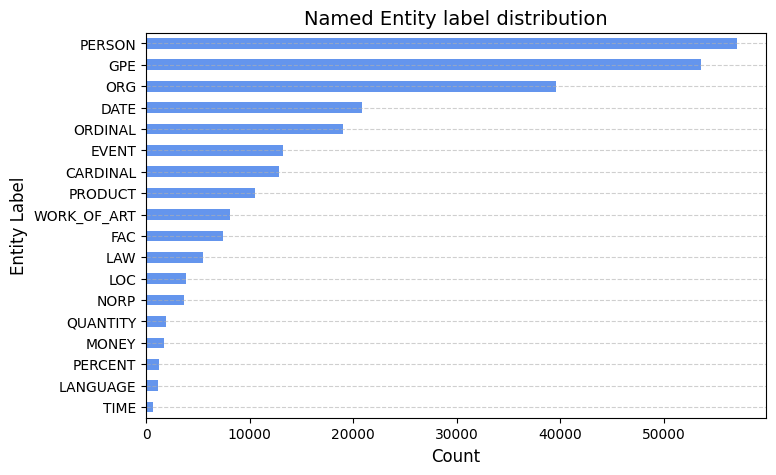

In [94]:
plt.figure(figsize=(8,5))
entities_df["entity_label"].value_counts(ascending=True).plot(kind='barh', color='cornflowerblue')

plt.title("Named Entity label distribution", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Entity Label", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

### Most Common Entities

In [95]:
entity_counts = (
    entities_df.groupby(["entity_text", "entity_label"])
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
)

entity_counts.head(15)

,entity_text,entity_label,count
45,-,ORDINAL,17072
14378,Indonesia,GPE,6053
11325,Facebook,ORG,6024
9875,Dilansir,GPE,4843
1150,19,CARDINAL,4697
35455,WhatsApp,ORG,4250
8971,Covid,EVENT,4240
18909,Link Counter,ORG,3317
12863,HOAKS Link Counter,WORK_OF_ART,3300
6978,Beredar,GPE,3277


In [98]:
# Apply cleaning
# normalize entity_text and filter
entities_df["entity_text_norm"] = (
    entities_df["entity_text"].astype(str).str.strip().str.lower()
)

# Words you want to remove
WRONG_ENTITIES = [
    "dilansir", "link counter", "hoaks link counter","hoaks link", "beredar", "-"
]

# Mask for unwanted words
mask_wrong = entities_df["entity_text_norm"].isin(WRONG_ENTITIES)

# Mask for 1–2 digit numbers (e.g. "1", "07", "12")
mask_small_numbers = entities_df["entity_text_norm"].str.match(r"^\d{1,2}$")

# Combine both
mask_to_remove = mask_wrong | mask_small_numbers

# Filter out unwanted entities
entities_df = entities_df[~mask_to_remove].copy()

# Recalculate entity counts
entity_counts = (
    entities_df.groupby(["entity_text", "entity_label"])
    .size()
    .reset_index(name="count")
    .sort_values("count", ascending=False)
)

entity_counts.head(15)


,entity_text,entity_label,count
14150,Indonesia,GPE,6053
11103,Facebook,ORG,6024
35226,WhatsApp,ORG,4250
8752,Covid,EVENT,4240
14894,Jakarta,GPE,2218
17015,Kementerian,GPE,1566
33668,Twitter,ORG,1434
1343,2019,DATE,1392
28500,Rp,MONEY,1359
15370,Jokowi,PERSON,1347


In [87]:
entities_df.loc[entities_df["entity_text"].str.contains("Link Counter", case=False)]

,teks,entity_text,entity_label,corrected_label,entity_text_norm
22,Penjelasan: Beredar sebuah unggahan video di m...,Link Counter,ORG,ORG,link counter
41,Penjelasan: Beredar akun Facebook mengatasnama...,Link Counter,ORG,ORG,link counter
55,Penjelasan: Beredar unggahan di media sosial F...,Link Counter,ORG,ORG,link counter
81,Penjelasan: Beredar sebuah unggahan di media s...,Link Counter,ORG,ORG,link counter
94,"Penjelasan: Beredar di aplikasi WhatsApp, sebu...",Link Counter,ORG,ORG,link counter
...,...,...,...,...,...
252503,[Hoaks] TNI-POLRI Gunakan serangan bom udara d...,Link Counter,ORG,ORG,link counter
252523,"Hayo Nusron Kamu Bisa, Bawa Pasukan Banser Hoa...",Link Counter,ORG,ORG,link counter
252535,Ma’ruf Amin Sakit Parah Karena Terjatuh Hoaks/...,Link Counter,ORG,ORG,link counter
252562,Penjelasan : Sudah tidak asing bagi kita berit...,Link Counter,ORG,ORG,link counter


In [102]:
doc = nlp(df["body_text"].iloc[7900])
displacy.render(doc, style="ent", jupyter=True)